In [63]:
import numpy as np
import matplotlib.pyplot as plt

from sogaPreprocessor import *
from producecfg import *
from libSOGA import *

## Laplace example 4 - 20 variables, Gaussian prior

In [61]:
output4pymc = np.loadtxt("../programs/SOGA/Privug/rasmus/Laplace/output4.txt")
print('Mean: ', np.round(np.mean(output4pymc), 3))
print('Var: ', np.round(np.var(output4pymc), 3))

Mean:  434.644
Var:  2863.116


In [2]:
with pm.Model() as laplace_dp_no_obs:
    DB_size = 20
    num_lower = 2
    inc_lower = pm.Uniform('inc_lower',200, 400, shape=num_lower)
    inc_higher = pm.Uniform('inc_higher',300, 600, shape=DB_size-num_lower)
    avg_income = (inc_lower.sum() + inc_higher.sum()) / DB_size
    Delta = 600/DB_size # sensitivity
    epsilon = 1
    noise = pm.Laplace('noise',mu=0,b=Delta/epsilon) # the variance of this Laplace distribution is 2b^2
    output = pm.Deterministic('output', avg_income + noise) # this operation only shifts the mean of the Laplace
    trace_no_obs = pm.sample(20000)



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [inc_lower, inc_higher, noise]


Sampling 4 chains for 1_000 tune and 20_000 draw iterations (4_000 + 80_000 draws total) took 34 seconds.


In [65]:
file = '../programs/SOGA/Privug/rasmus/Laplace/Laplace4.soga'
compiledFile = compile2SOGA(file)
cfg = produce_cfg(compiledFile)

start = time()
output4soga = start_SOGA(cfg)
end = time()
print('Computed in {}'.format(np.round(end-start,2)))

Computed in 0.02


In [69]:
idx = output4soga.var_list.index('sum')

mean_soga = output4soga.gm.mean()[idx]
var_soga = output4soga.gm.cov()[idx, idx]
std_soga = np.sqrt(var_soga)

print('Mean: ', np.round(mean_soga, 3))
print('Var: ', np.round(var_soga, 3))

Mean:  435.0
Var:  2869.149


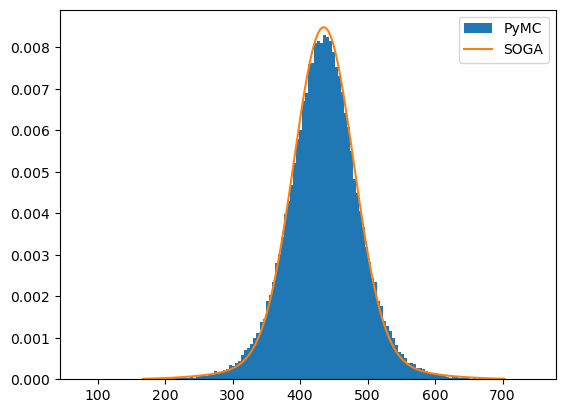

In [72]:
x = np.linspace(mean_soga-5*std_soga, mean_soga+5*std_soga, 250)

_ = plt.hist(output4pymc, bins=150, density=True, label='PyMC')
_ = plt.plot(x, output4soga.gm.marg_pdf(x,idx), label='SOGA')
_ = plt.legend()

## Laplace example 3 - 10 variables, Uniform prior

In [75]:
output3pymc = np.loadtxt("../programs/SOGA/Privug/rasmus/Laplace/output3.txt")
print('Mean: ', np.round(np.mean(output3pymc), 3))
print('Var: ', np.round(np.var(output3pymc), 3))

Mean:  419.933
Var:  7864.459


In [76]:
file = '../programs/SOGA/Privug/rasmus/Laplace/Laplace3.soga'
compiledFile = compile2SOGA(file)
cfg = produce_cfg(compiledFile)

start = time()
output3soga = start_SOGA(cfg)
end = time()
print('Computed in {}'.format(np.round(end-start,2)))

Computed in 1.13


In [77]:
idx = output3soga.var_list.index('sum')

mean_soga = output3soga.gm.mean()[idx]
var_soga = output3soga.gm.cov()[idx, idx]
std_soga = np.sqrt(var_soga)

print('Mean: ', np.round(mean_soga, 3))
print('Var: ', np.round(var_soga, 3))

Mean:  420.008
Var:  7893.177


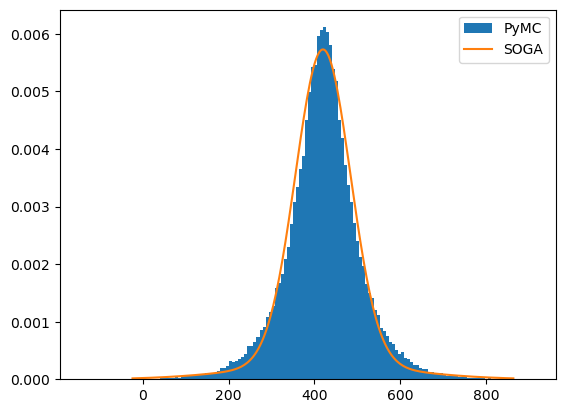

In [78]:
x = np.linspace(mean_soga-5*std_soga, mean_soga+5*std_soga, 250)

_ = plt.hist(output3pymc, bins=150, density=True, label='PyMC')
_ = plt.plot(x, output3soga.gm.marg_pdf(x,idx), label='SOGA')
_ = plt.legend()